# 1. Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import macrosynergy.management as msm
import macrosynergy.panel as msp
import macrosynergy.signal as mss
import macrosynergy.pnl as msn
import warnings

warnings.simplefilter("ignore")

In [2]:
# Cross-sections of interest
cids_dm = ["AUD", "CAD", "CHF", "EUR", "GBP", "JPY", "NOK", "NZD", "SEK", "USD"]
cids_em = [
    "CLP",
    "COP",
    "CZK",
    "HUF",
    "IDR",
    "ILS",
    "INR",
    "KRW",
    "MXN",
    "PLN",
    "THB",
    "TRY",
    "TWD",
    "ZAR",
]
cids = cids_dm + cids_em
cids_du = cids_dm + cids_em
cids_dux = list(set(cids_du) - {"IDR", "NZD"})
cids_xg2 = list(set(cids_dux) - {"EUR", "USD"})

In [3]:
# Quantamental categories of interest

ecos = [
    "CPIC_SA_P1M1ML12",
    "CPIC_SJA_P3M3ML3AR",
    "CPIC_SJA_P6M6ML6AR",
    "CPIH_SA_P1M1ML12",
    "CPIH_SJA_P3M3ML3AR",
    "CPIH_SJA_P6M6ML6AR",
    "INFTEFF_NSA",
    "INTRGDP_NSA_P1M1ML12_3MMA",
    "INTRGDPv5Y_NSA_P1M1ML12_3MMA",
    "PCREDITGDP_SJA_D1M1ML12",
    "PCREDITBN_SJA_P1M1ML12",
    "RGDP_SA_P1Q1QL4_20QMA",
    "RYLDIRS02Y_NSA",
    "RYLDIRS05Y_NSA",
]
mkts = [
    "DU02YXR_NSA",
    "DU05YXR_NSA",
    "DU02YXR_VT10",
    "DU05YXR_VT10",
    "EQXR_NSA",
    "EQXR_VT10",
    "FXXR_NSA",
    "FXXR_VT10",
    "FXCRR_NSA",
    "FXTARGETED_NSA",
    "FXUNTRADABLE_NSA",
]

xcats = ecos + mkts

In [4]:
# load the dataset:

df = pd.read_csv(
    "JPMaQS_Quantamental_Indicators.csv", index_col=0, parse_dates=["real_date"]
)

scols = ["cid", "xcat", "real_date", "value"]  # required columns
df = df[scols].copy()
display(df.tail(3))
df.info()

,cid,xcat,real_date,value
3350268,ZAR,RGDP_SA_P1Q1QL4_20QMA,2023-08-31,0.534737
3350269,ZAR,RYLDIRS02Y_NSA,2023-08-31,3.230619
3350270,ZAR,RYLDIRS05Y_NSA,2023-08-31,3.543863


<class 'pandas.core.frame.DataFrame'>
Index: 3350271 entries, 0 to 3350270
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   cid        object        
 1   xcat       object        
 2   real_date  datetime64[ns]
 3   value      float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 127.8+ MB


In [5]:
display(df["xcat"].unique())
display(df["cid"].unique())
df["ticker"] = df["cid"] + "_" + df["xcat"]

array(['CPIC_SA_P1M1ML12', 'CPIC_SJA_P3M3ML3AR', 'CPIC_SJA_P6M6ML6AR',
       'CPIH_SA_P1M1ML12', 'CPIH_SJA_P3M3ML3AR', 'CPIH_SJA_P6M6ML6AR',
       'FXTARGETED_NSA', 'FXUNTRADABLE_NSA', 'FXXR_NSA', 'FXXR_VT10',
       'INFTEFF_NSA', 'INTRGDP_NSA_P1M1ML12_3MMA',
       'INTRGDPv5Y_NSA_P1M1ML12_3MMA', 'PCREDITBN_SJA_P1M1ML12',
       'PCREDITGDP_SJA_D1M1ML12', 'RGDP_SA_P1Q1QL4_20QMA',
       'RYLDIRS02Y_NSA', 'RYLDIRS05Y_NSA', 'DU02YXR_NSA', 'DU02YXR_VT10',
       'DU05YXR_NSA', 'DU05YXR_VT10', 'EQXR_NSA', 'EQXR_VT10',
       'FXCRR_NSA'], dtype=object)

array(['AUD', 'CAD', 'CHF', 'CLP', 'COP', 'CZK', 'EUR', 'GBP', 'HUF',
       'IDR', 'ILS', 'INR', 'JPY', 'KRW', 'MXN', 'NOK', 'NZD', 'PLN',
       'SEK', 'THB', 'TRY', 'TWD', 'USD', 'ZAR'], dtype=object)

## 2. Data Missingness

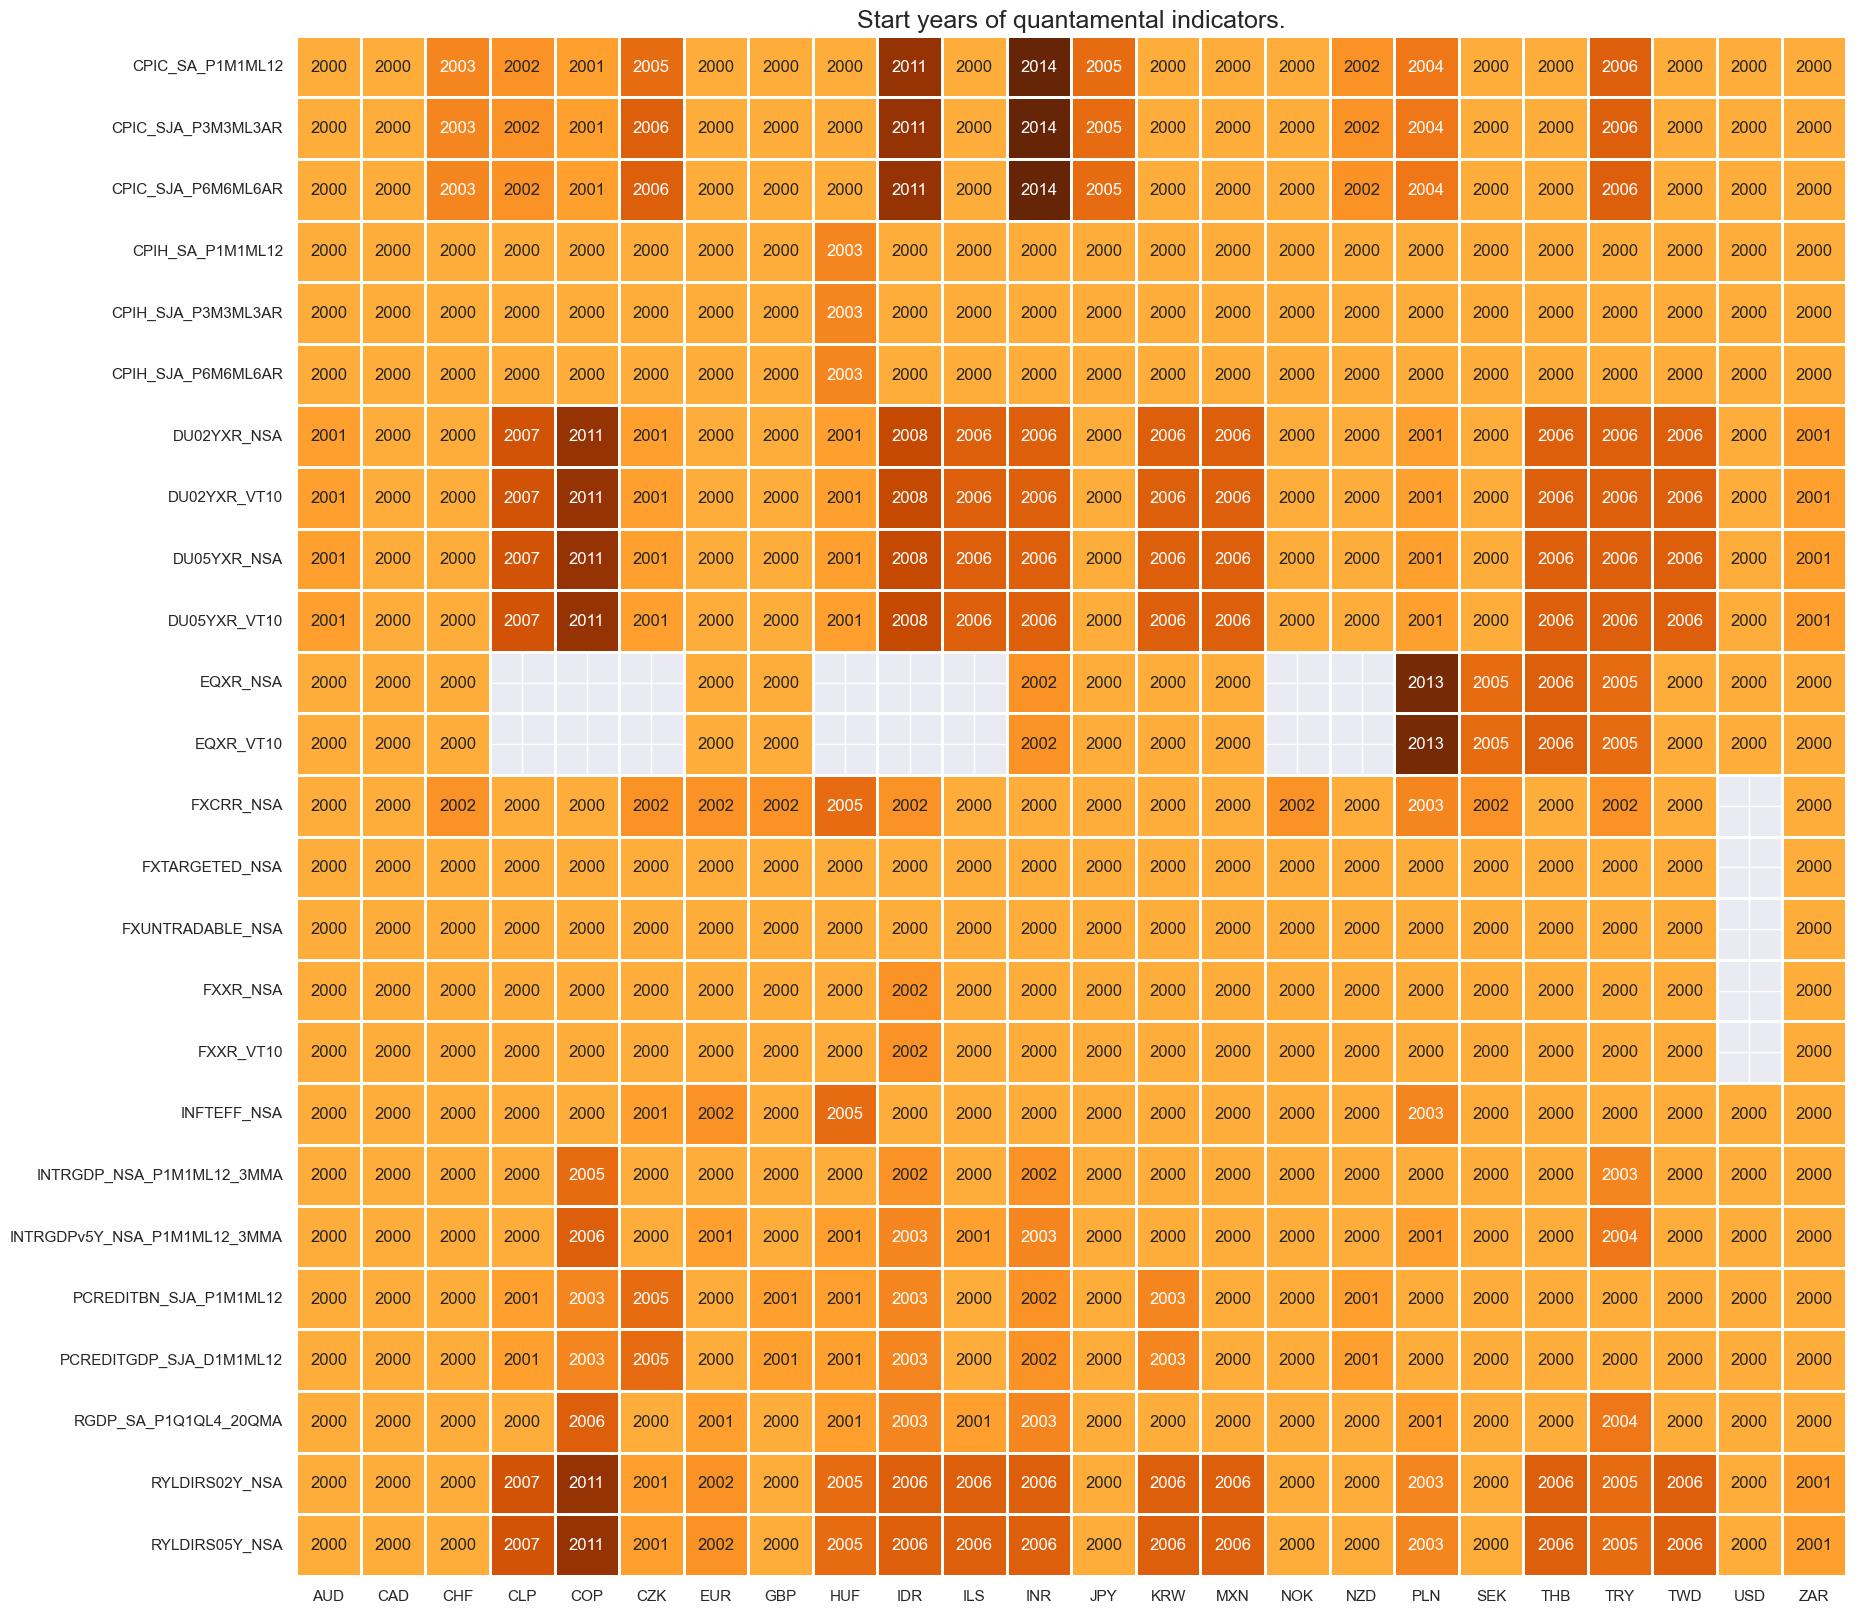

In [6]:
cids = df["cid"].unique()
x_cats = df["xcat"].unique()
dfx = msm.reduce_df(df, cids=cids, xcats=xcats)
dfs = msm.check_startyears(
    dfx,
)
msm.visual_paneldates(dfs, size=(20, 20))

In [7]:
df.set_index("real_date", inplace=True)
df.sort_index(inplace=True)
df

,cid,xcat,value,ticker
real_date,,,,
2000-01-03,AUD,CPIC_SA_P1M1ML12,1.244168,AUD_CPIC_SA_P1M1ML12
2000-01-03,AUD,CPIC_SJA_P3M3ML3AR,3.006383,AUD_CPIC_SJA_P3M3ML3AR
2000-01-03,AUD,CPIC_SJA_P6M6ML6AR,1.428580,AUD_CPIC_SJA_P6M6ML6AR
2000-01-03,AUD,CPIH_SA_P1M1ML12,1.647446,AUD_CPIH_SA_P1M1ML12
2000-01-03,AUD,CPIH_SJA_P3M3ML3AR,3.308241,AUD_CPIH_SJA_P3M3ML3AR
...,...,...,...,...
2023-08-31,ZAR,PCREDITBN_SJA_P1M1ML12,5.969562,ZAR_PCREDITBN_SJA_P1M1ML12
2023-08-31,ZAR,PCREDITGDP_SJA_D1M1ML12,3.751332,ZAR_PCREDITGDP_SJA_D1M1ML12
2023-08-31,ZAR,RGDP_SA_P1Q1QL4_20QMA,0.534737,ZAR_RGDP_SA_P1Q1QL4_20QMA


In [8]:
target = "USD_DU05YXR_VT10"
df_USD = df[df["cid"] == "USD"].copy()
df_USD = df_USD.pivot_table(
    index="real_date", columns="xcat", values="value", aggfunc="first"
)
print(df_USD.index.min(), df_USD.index.max(), sep="\n")
display(df_USD.isnull().sum())

# remove missing values (19 rows)
df_USD.dropna(inplace=True)
print(df_USD.index.min(), df_USD.index.max(), sep="\n")
df.reset_index(inplace=True)
df

2000-01-03 00:00:00
2023-08-31 00:00:00


xcat
CPIC_SA_P1M1ML12                 0
CPIC_SJA_P3M3ML3AR               0
CPIC_SJA_P6M6ML6AR               0
CPIH_SA_P1M1ML12                 0
CPIH_SJA_P3M3ML3AR               0
CPIH_SJA_P6M6ML6AR               0
DU02YXR_NSA                      0
DU02YXR_VT10                     0
DU05YXR_NSA                      0
DU05YXR_VT10                     0
EQXR_NSA                         0
EQXR_VT10                        0
INFTEFF_NSA                     19
INTRGDP_NSA_P1M1ML12_3MMA        0
INTRGDPv5Y_NSA_P1M1ML12_3MMA     0
PCREDITBN_SJA_P1M1ML12           0
PCREDITGDP_SJA_D1M1ML12          0
RGDP_SA_P1Q1QL4_20QMA            0
RYLDIRS02Y_NSA                  19
RYLDIRS05Y_NSA                  19
dtype: int64

2000-01-28 00:00:00
2023-08-31 00:00:00


,real_date,cid,xcat,value,ticker
0,2000-01-03,AUD,CPIC_SA_P1M1ML12,1.244168,AUD_CPIC_SA_P1M1ML12
1,2000-01-03,AUD,CPIC_SJA_P3M3ML3AR,3.006383,AUD_CPIC_SJA_P3M3ML3AR
2,2000-01-03,AUD,CPIC_SJA_P6M6ML6AR,1.428580,AUD_CPIC_SJA_P6M6ML6AR
3,2000-01-03,AUD,CPIH_SA_P1M1ML12,1.647446,AUD_CPIH_SA_P1M1ML12
4,2000-01-03,AUD,CPIH_SJA_P3M3ML3AR,3.308241,AUD_CPIH_SJA_P3M3ML3AR
...,...,...,...,...,...
3350266,2023-08-31,ZAR,PCREDITBN_SJA_P1M1ML12,5.969562,ZAR_PCREDITBN_SJA_P1M1ML12
3350267,2023-08-31,ZAR,PCREDITGDP_SJA_D1M1ML12,3.751332,ZAR_PCREDITGDP_SJA_D1M1ML12
3350268,2023-08-31,ZAR,RGDP_SA_P1Q1QL4_20QMA,0.534737,ZAR_RGDP_SA_P1Q1QL4_20QMA
3350269,2023-08-31,ZAR,RYLDIRS02Y_NSA,3.230619,ZAR_RYLDIRS02Y_NSA


# 3. Some EDA

xcat,CPIC_SA_P1M1ML12,CPIC_SJA_P3M3ML3AR,CPIC_SJA_P6M6ML6AR,CPIH_SA_P1M1ML12,CPIH_SJA_P3M3ML3AR,CPIH_SJA_P6M6ML6AR,DU02YXR_NSA,DU02YXR_VT10,DU05YXR_NSA,DU05YXR_VT10,EQXR_NSA,EQXR_VT10,INFTEFF_NSA,INTRGDP_NSA_P1M1ML12_3MMA,INTRGDPv5Y_NSA_P1M1ML12_3MMA,PCREDITBN_SJA_P1M1ML12,PCREDITGDP_SJA_D1M1ML12,RGDP_SA_P1Q1QL4_20QMA,RYLDIRS02Y_NSA,RYLDIRS05Y_NSA
real_date,,,,,,,,,,,,,,,,,,,,
2000-01-28,1.370914,1.657018,1.379426,2.676399,2.900698,2.310195,-0.164496,-1.656664,-0.283467,-1.140352,-3.071358,-2.706615,1.687093,4.246351,0.233658,5.821268,2.134546,3.847062,5.384795,5.651882
2000-01-31,1.370914,1.657018,1.379426,2.676399,2.900698,2.310195,-0.127303,-1.282086,-0.378624,-1.523157,2.524698,2.224874,1.687093,4.246351,0.233658,5.821268,2.134546,3.847062,5.456108,5.744223
2000-02-01,1.370914,1.657018,1.379426,2.676399,2.900698,2.310195,0.050594,0.397842,0.176418,0.501679,1.127766,0.442731,1.687093,4.307657,0.294964,5.821268,2.134546,3.847062,5.431042,5.702988
2000-02-02,1.370914,1.657018,1.379426,2.676399,2.900698,2.310195,-0.085187,-0.669854,-0.136642,-0.388570,-0.091756,-0.036021,1.687093,4.307657,0.294964,5.821268,2.134546,3.847062,5.479480,5.737156
2000-02-03,1.370914,1.657018,1.379426,2.676399,2.900698,2.310195,0.037650,0.296059,0.214934,0.611209,1.476510,0.579638,1.687093,4.307657,0.294964,5.821268,2.134546,3.847062,5.461373,5.686597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,4.099531,3.825302,4.495613,3.299075,2.273834,3.371062,-0.083260,-0.399182,-0.087357,-0.148746,0.644095,0.762351,3.371531,2.746773,0.598888,5.325518,2.161493,2.027798,1.430056,0.769388
2023-08-28,4.099531,3.825302,4.495613,3.299075,2.273834,3.371062,-0.000300,-0.001440,0.110547,0.188232,0.634309,0.750769,3.371531,2.746773,0.598888,5.325518,2.161493,2.027798,1.429350,0.743887
2023-08-29,4.099531,3.825302,4.495613,3.299075,2.273834,3.371062,0.218825,1.049129,0.532207,0.906205,1.451967,1.718549,3.371531,2.746773,0.598888,5.325518,2.161493,2.027798,1.313607,0.624998


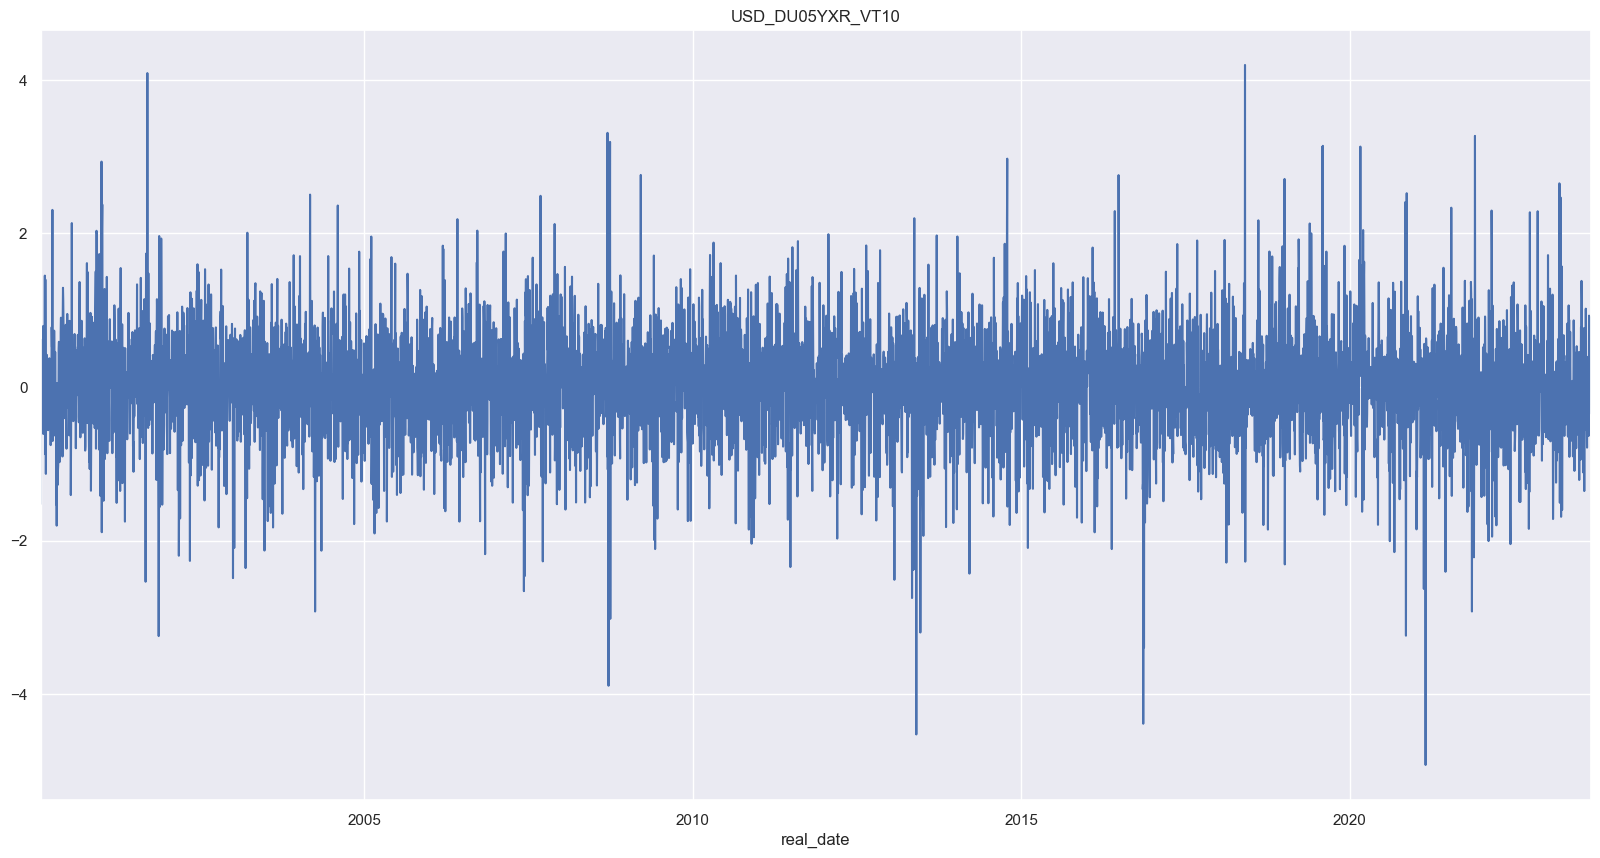

In [9]:
df_USD["DU05YXR_VT10"].plot(figsize=(20, 10), title=target)
df_USD

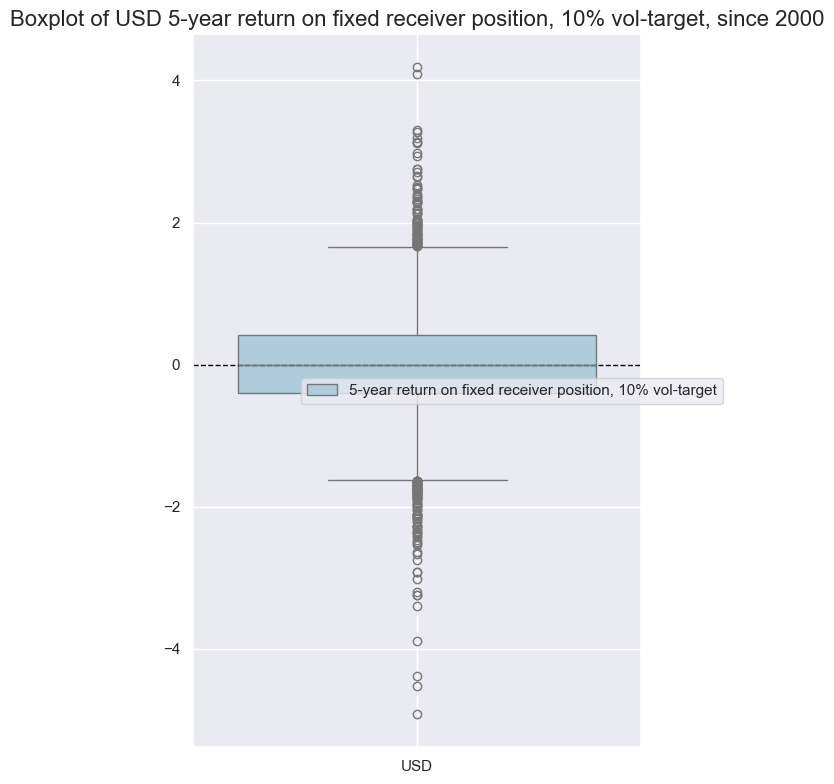

In [10]:
xcatx = ["DU05YXR_VT10"]

msp.view_ranges(
    df=df,
    xcats=xcatx,
    cids=["USD"],
    sort_cids_by="std",
    start="2000-01-01",
    kind="box",
    title="Boxplot of USD 5-year return on fixed receiver position, 10% vol-target, since 2000",
    xcat_labels=["5-year return on fixed receiver position, 10% vol-target"],
    size=(6, 8),
)

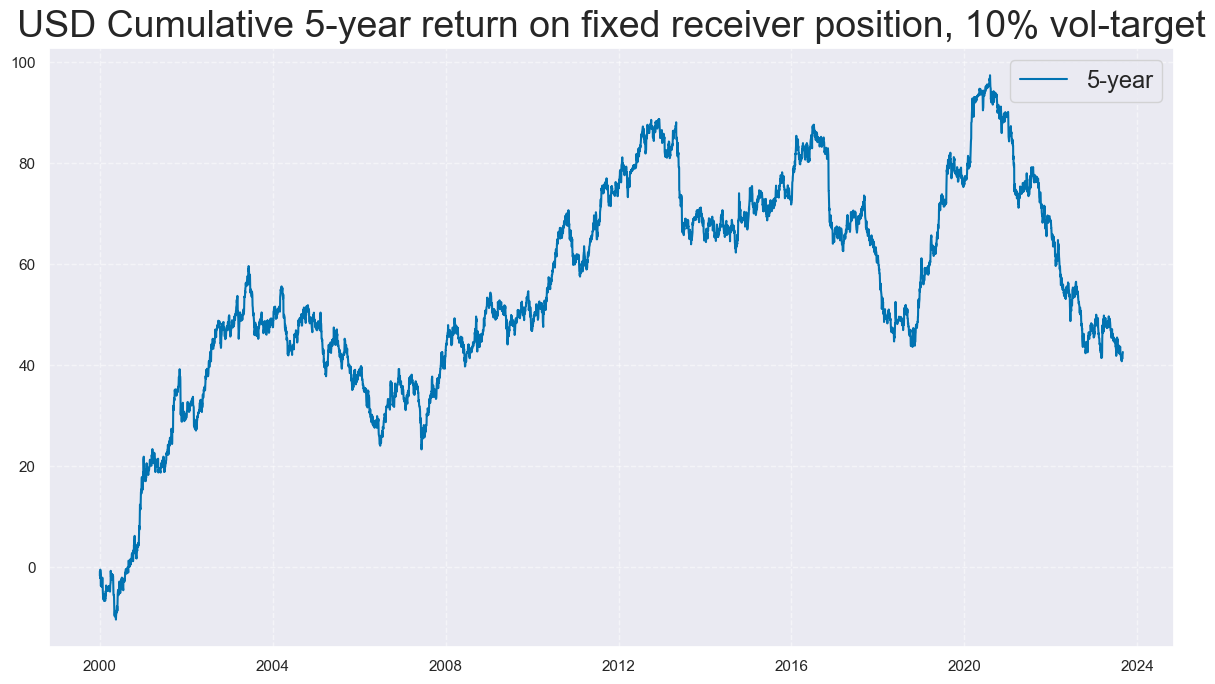

In [11]:
xcatx = ["DU05YXR_VT10"]

msp.view_timelines(
    df=df,
    xcats=xcatx,
    cids=["USD"],
    start="2000-01-01",
    title="USD Cumulative 5-year return on fixed receiver position, 10% vol-target",
    xcat_labels=["5-year"],
    cumsum=True,
    title_adj=1.03,
    title_xadj=0.47,
    label_adj=0.075,
    title_fontsize=27,
    legend_fontsize=17,
    ncol=1,
    same_y=False,
    size=(10, 7),
    aspect=1.7,
)

# TODO: LSTM Implementation

In [12]:
# LSTM packages
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from keras import Sequential
from keras.layers import LSTM, Dense, BatchNormalization, Dropout
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

In [13]:
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(
            hp.Choice("units_1", [64, 128, 256]),
            activation="relu",
            input_shape=(X_train.shape[1], 1),
            return_sequences=True,
        )
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(
        LSTM(
            hp.Choice("units_2", [8, 16, 32]), activation="relu", return_sequences=False
        )
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1))
    opt = hp.Choice("optimizer", ["adam", "RMSProp", "SGD"])
    if opt == "adam":
        optimizer = keras.optimizers.Adam(
            learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        )
    elif opt == "RMSProp":
        optimizer = keras.optimizers.RMSprop(
            learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        )
    else:
        optimizer = keras.optimizers.SGD(
            learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        )
    model.compile(
        optimizer=optimizer,
        loss="mse",
        metrics=["mae"],
    )
    early_stop = EarlyStopping(
        monitor="val_loss", mode="min", verbose=0, patience=7, restore_best_weights=True
    )
    return model

In [14]:
# splitting into development and test by time here to avoid data leakage
# The test set should be the same across all models for fair comparison
df_USD = df_USD.reset_index()
index = int(len(df_USD) * 0.9)
X_dev, X_test = df_USD.iloc[:index], df_USD.iloc[index:]

y_test = np.array(X_test["DU05YXR_VT10"])
y_test = y_test.reshape(y_test.shape[0], 1)

X_test = np.array(X_test.drop(columns=["DU05YXR_VT10", "real_date"]))
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

total_mse = 0.0
total_mae = 0.0
total_r2 = 0.0


# Train and Cross validation for 4 folds
tss = TimeSeriesSplit(n_splits=4)

models = []
# train a model for each fold and report the metrics
for train_index, val_index in tss.split(X_dev):
    train_set = df_USD.iloc[train_index]
    val_set = df_USD.iloc[val_index]

    y_train = np.array(train_set["DU05YXR_VT10"])
    y_train = y_train.reshape(y_train.shape[0], 1)

    X_train = np.array(train_set.drop(columns=["DU05YXR_VT10", "real_date"]))
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

    y_val = np.array(val_set["DU05YXR_VT10"])
    y_val = y_val.reshape(val_set.shape[0], 1)

    X_val = np.array(val_set.drop(columns=["DU05YXR_VT10", "real_date"]))
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

    # Hyperparameter training part
    tuner = RandomSearch(build_model, objective="val_loss", max_trials=5)

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
    best_model = tuner.get_best_models()[0]
    print(best_model.summary())
    models.append(best_model)

Reloading Tuner from .\untitled_project\tuner0.json


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 19, 64)            16896     
                                                                 
 batch_normalization (Batch  (None, 19, 64)            256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 19, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 d

In [15]:
res = []
y_dev = np.array(X_dev["DU05YXR_VT10"])
y_dev = y_dev.reshape(y_dev.shape[0], 1)
X_dev = np.array(X_dev.drop(columns=["DU05YXR_VT10", "real_date"]))
X_dev = X_dev.reshape(X_dev.shape[0], X_dev.shape[1], 1)
for i, model in enumerate(models):
    res.append(model.evaluate(X_dev, y_dev))
res



174/174 [==============================] - 1s 5ms/step - loss: 0.5254 - mae: 0.2475


[[0.5254427194595337, 0.24750015139579773],
 [0.5254427194595337, 0.24750015139579773],
 [0.5254427194595337, 0.24750015139579773],
 [0.5254427194595337, 0.24750015139579773]]

In [16]:
# Retrain on the optimal hyperparameter and evaluate on the test set
best_model = models[0]
history = best_model.fit(X_dev, y_dev, epochs=50)
records = best_model.evaluate(X_test, y_test)
results = best_model.predict(X_test)

print("The following are the results of my best model on the test set")
print("---------------------------------------------------------------")
print("The mean square error is " + str(records[1]))
print("The r2 score is: " + str(r2_score(y_test, results)))
print("The mean absolute error is: " + str(mean_absolute_error(y_test, results)))

total_mse += records[1]
total_r2 += r2_score(y_test, results)
total_mae += mean_absolute_error(y_test, results)

plt.title("The performance of LSTM model on predicting DU05YXR_VT10")
plt.plot(df_USD.iloc[index:]["real_date"], df_USD.iloc[index:]["DU05YXR_VT10"])
plt.plot(df_USD.iloc[index:]["real_date"], results)
plt.xticks(rotation=45)
plt.legend(["Ground Truth", "Prediction"])
plt.xlabel("Date")
plt.ylabel("DU05YXR_VT10")
plt.show()

Epoch 1/50
